# Insurance Claim Fraud Detection

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Data Cleaning

In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In _c39 column there is a missing value.

                                      Check percentage of missing value

In [6]:
data['_c39'].isnull().sum()/len(data['_c39'])*100

100.0

100% data is missing so we drop that column from the data.

In [7]:
data=data.drop(['_c39'],axis=1)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

                                        Feature Engineering

In [9]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['policy_bind_Day']=data['policy_bind_date'].dt.day
data['policy_bind_Month']=data['policy_bind_date'].dt.month
data['policy_bind_Year']=data['policy_bind_date'].dt.year

In [10]:
data=data.drop(['policy_bind_date'],axis=1)

In [11]:
data['incident_date']=pd.to_datetime(data['incident_date'])
data['incident_Day']=data['incident_date'].dt.day
data['incident_Month']=data['incident_date'].dt.month
data['incident_Year']=data['incident_date'].dt.year

In [12]:
data=data.drop(['incident_date'],axis=1)
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


# Data Visualisation

                                    Visualisation of categorical data

In [13]:
data_visualization_nominal=data[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
                                'authorities_contacted','incident_state','incident_city','incident_location',
                                 'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses',
                                 'police_report_available','auto_make','auto_model','fraud_reported']].copy()
data_visualization_nominal.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

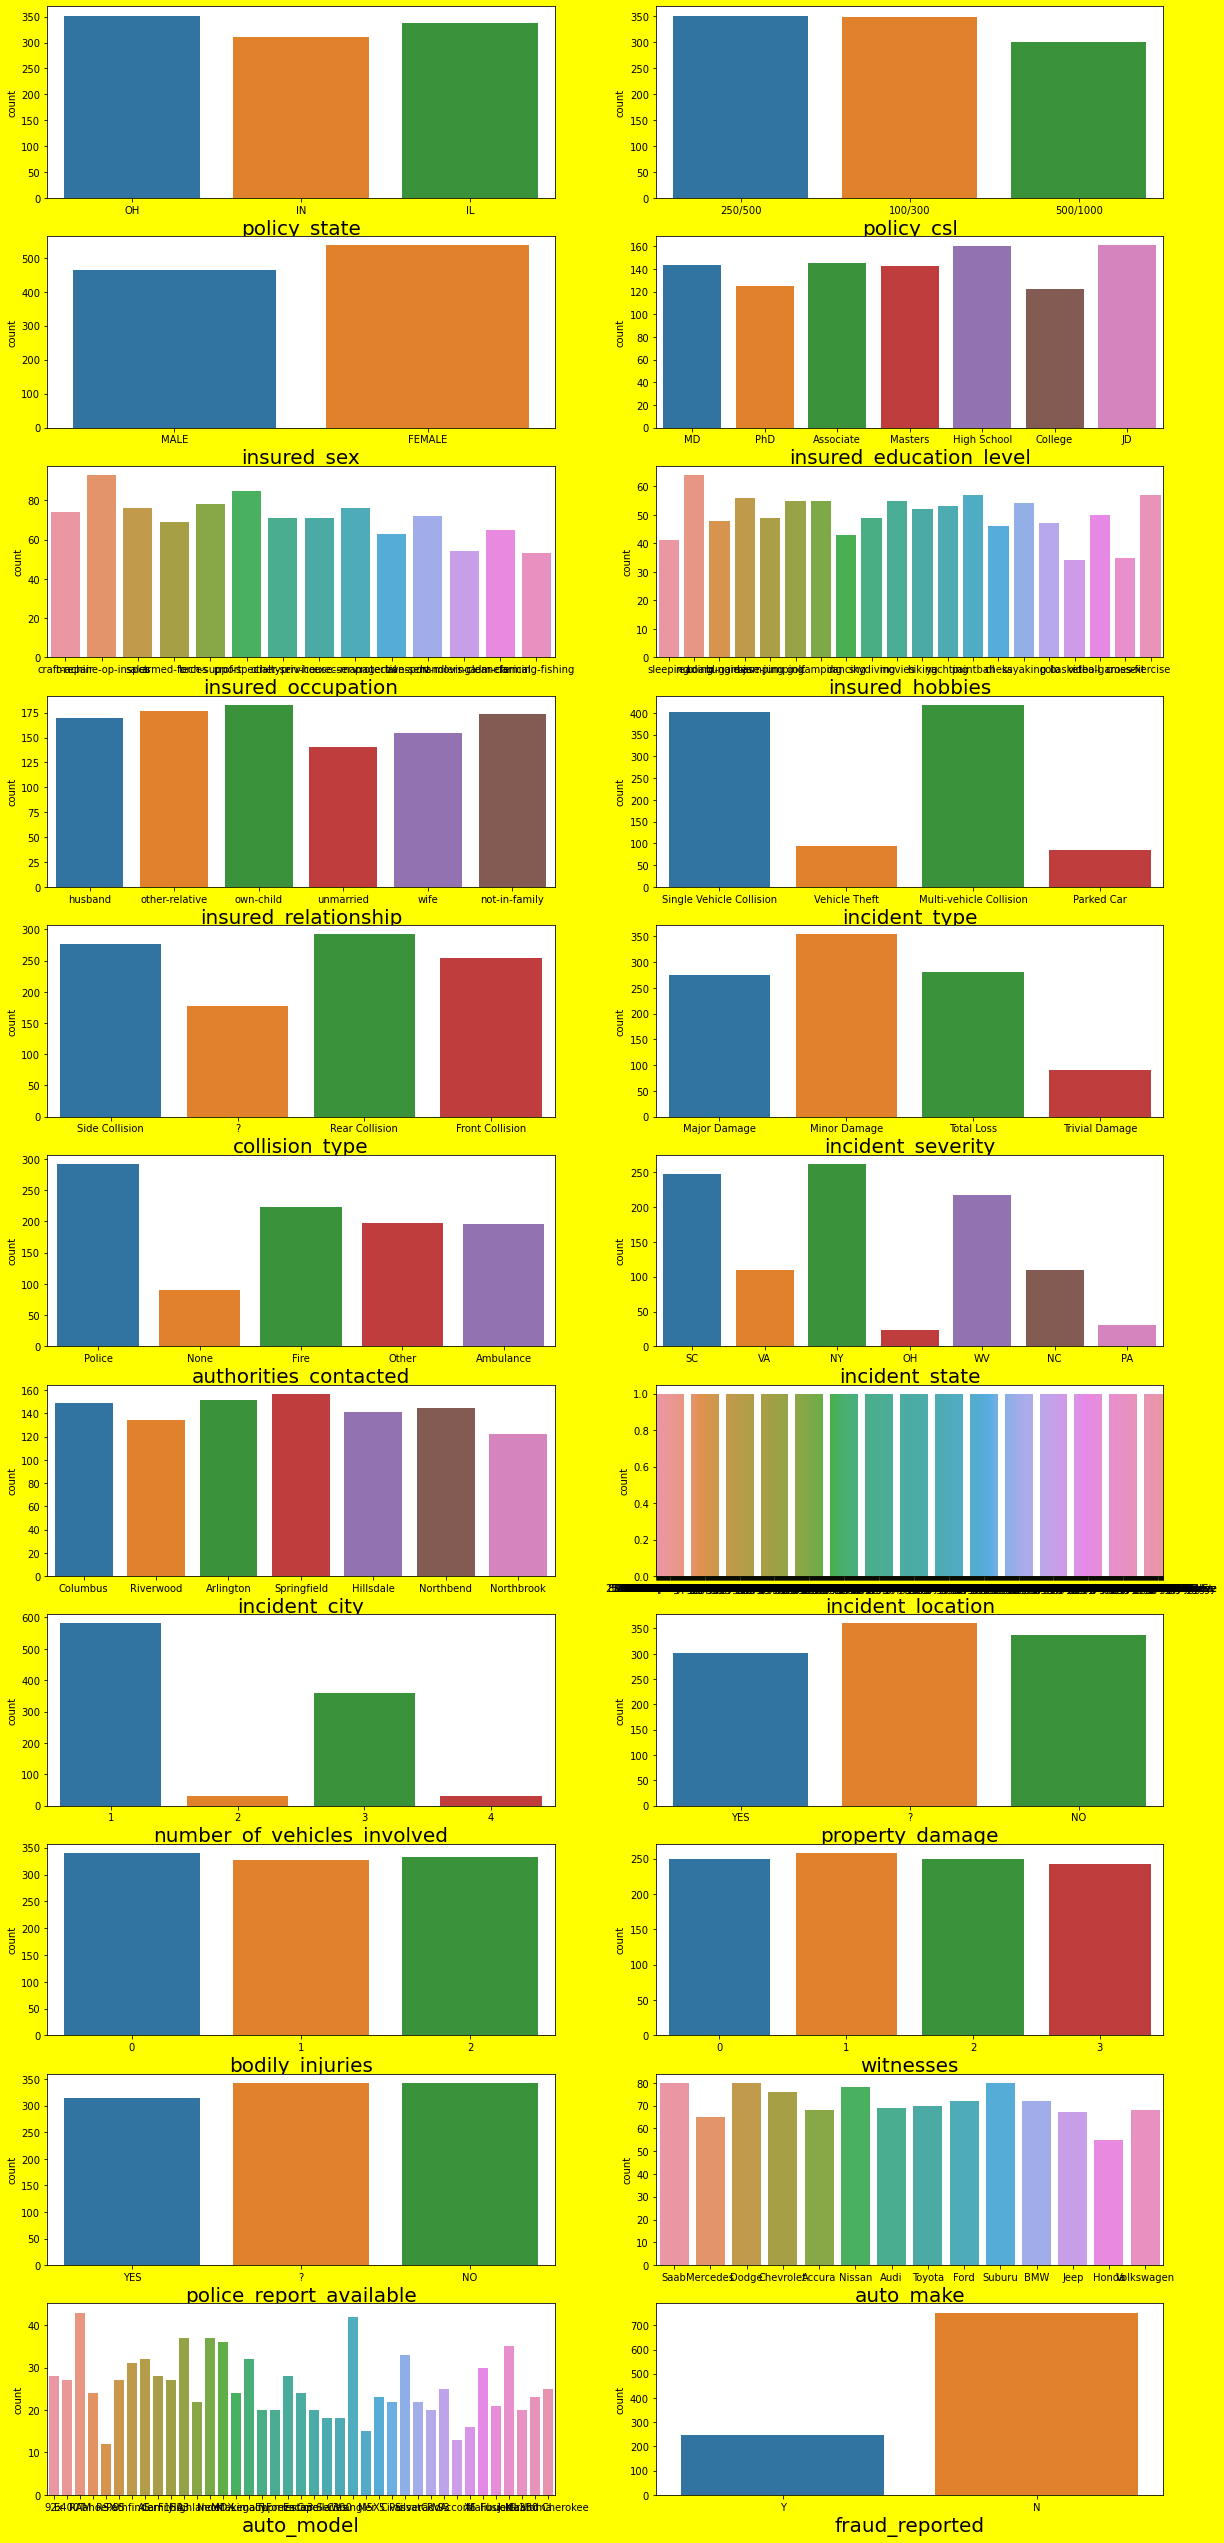

In [14]:
plt.figure(figsize=(20,50),facecolor='yellow')
num =1

for column in data_visualization_nominal:
    if num <=22:
        ax = plt.subplot(12,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

In [15]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The data is imbalanced so,we have to balanced by SMOTE technique

                                        Visualisation of continuous data

In [16]:
data_visualization_continuous=data.drop(['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
                                'authorities_contacted','incident_state','incident_city','incident_location',
                                 'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses',
                                 'police_report_available','auto_make','auto_model','fraud_reported'],axis=1)
data_visualization_continuous.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year',
       'incident_Day', 'incident_Month', 'incident_Year'],
      dtype='object')

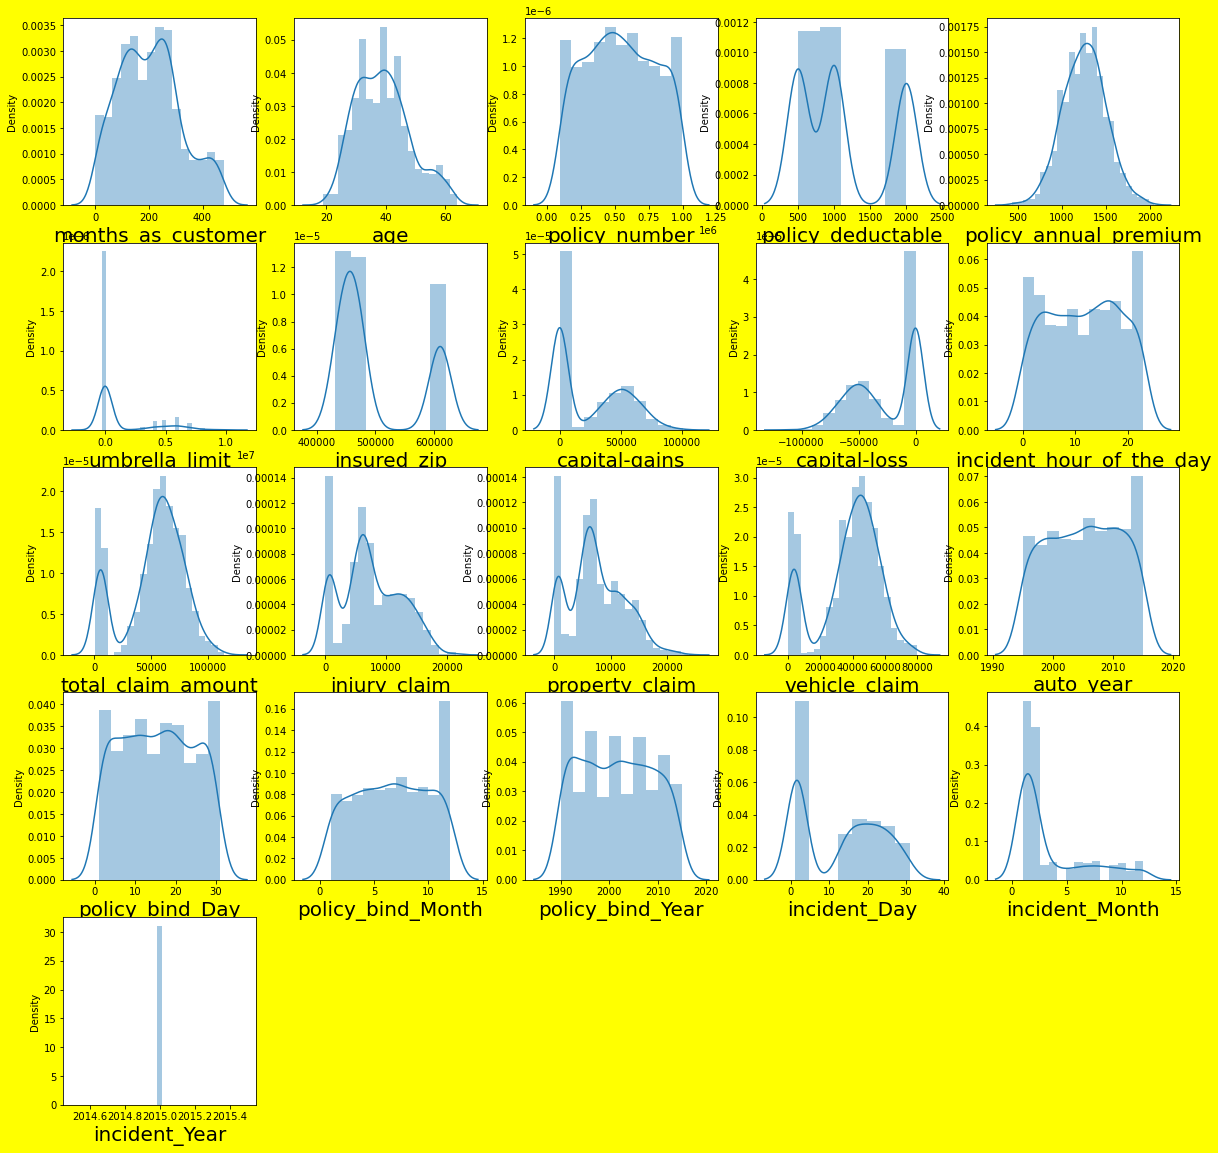

In [17]:
plt.figure(figsize=(20,20),facecolor ='yellow')
num =1

for column in data_visualization_continuous:
    if num <=21:
        ax = plt.subplot(5,5,num)
        sns.distplot(data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                             Replace the missing data

On visualising we see that the are three columns having question mark(?) in place of missing values.So,we replace by nan and 
impute those values.

In [18]:
data['collision_type']=data['collision_type'].replace('?',np.nan)
data['property_damage']=data['property_damage'].replace('?',np.nan)
data['police_report_available']=data['police_report_available'].replace('?',np.nan)

In [19]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

                                         Imputing Technique

In [20]:
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [22]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


                                        Encoding Technique

In [23]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [24]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,10.0,1.0,2004,1.0,17,10,2014,25,1,2015
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,8.0,12.0,2007,1.0,27,6,2006,21,1,2015
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,4.0,30.0,2007,0.0,9,6,2000,22,2,2015
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,3.0,34.0,2014,1.0,25,5,1990,1,10,2015
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,0.0,31.0,2009,0.0,6,6,2014,17,2,2015


# Analysis

In [25]:
data.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.0
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,13.08400,3.407000,2015.0
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,4.034869,11.136107,6.015861,0.431483,8.850176,3.391758,7.360391,10.44318,3.276291,0.0
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,2015.0
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,3.000000,10.000000,2000.000000,0.000000,8.000000,4.000000,1995.000000,2.00000,1.000000,2015.0
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,2015.0
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,10.000000,29.000000,2010.000000,0.000000,23.000000,9.000000,2008.000000,22.00000,5.000000,2015.0
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,2015.0


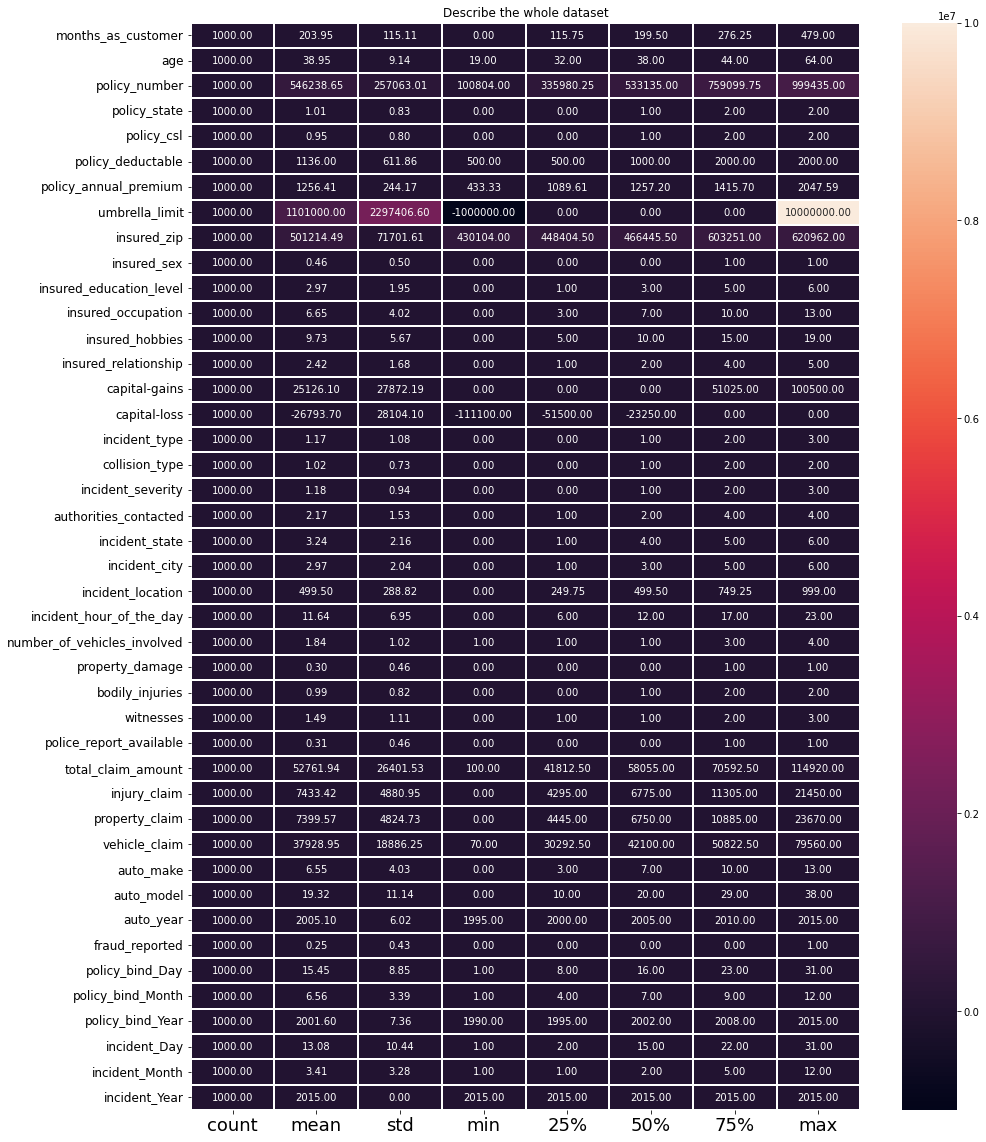

In [26]:
plt.figure(figsize=(15,20))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no missing values.

The number of rows and columns are:
    * rows = 1000
    * columns = 43
    
The mean, standard deviation, minimum, maximum values are:
    
    *

                                             Correlation

In [27]:
data.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,incident_Year
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.047655,0.004202,-0.000292,0.020544,0.051728,0.005750,-0.048276,-0.011092,0.024659,NaN
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.030410,0.017343,0.001354,0.012143,0.053869,0.015501,-0.037444,-0.006131,0.023404,NaN
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,0.023860,0.065240,-0.000183,-0.029443,0.041885,0.005509,-0.040099,0.057199,-0.042512,NaN
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.017124,-0.025253,0.002114,0.029432,0.002277,0.071450,-0.007276,0.014745,0.023643,NaN
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.004701,0.047885,-0.033082,-0.037190,0.018973,-0.045345,-0.016466,-0.004156,-0.011794,NaN
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,-0.035379,-0.003268,0.026105,0.014817,0.009164,-0.050416,-0.049598,-0.018160,-0.006418,NaN
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.000045,-0.031849,-0.049226,-0.014480,-0.025183,-0.035355,0.001249,0.014835,0.021559,NaN
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.004443,0.040256,0.009893,0.058622,-0.045207,0.009961,0.048008,-0.021716,0.042409,NaN
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.020892,0.023637,-0.032736,0.019368,-0.039867,0.015864,-0.001100,0.019095,0.005461,NaN
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.026457,-0.018421,-0.028247,0.030873,0.040713,-0.004033,-0.032891,-0.007280,0.024227,NaN


<AxesSubplot:>

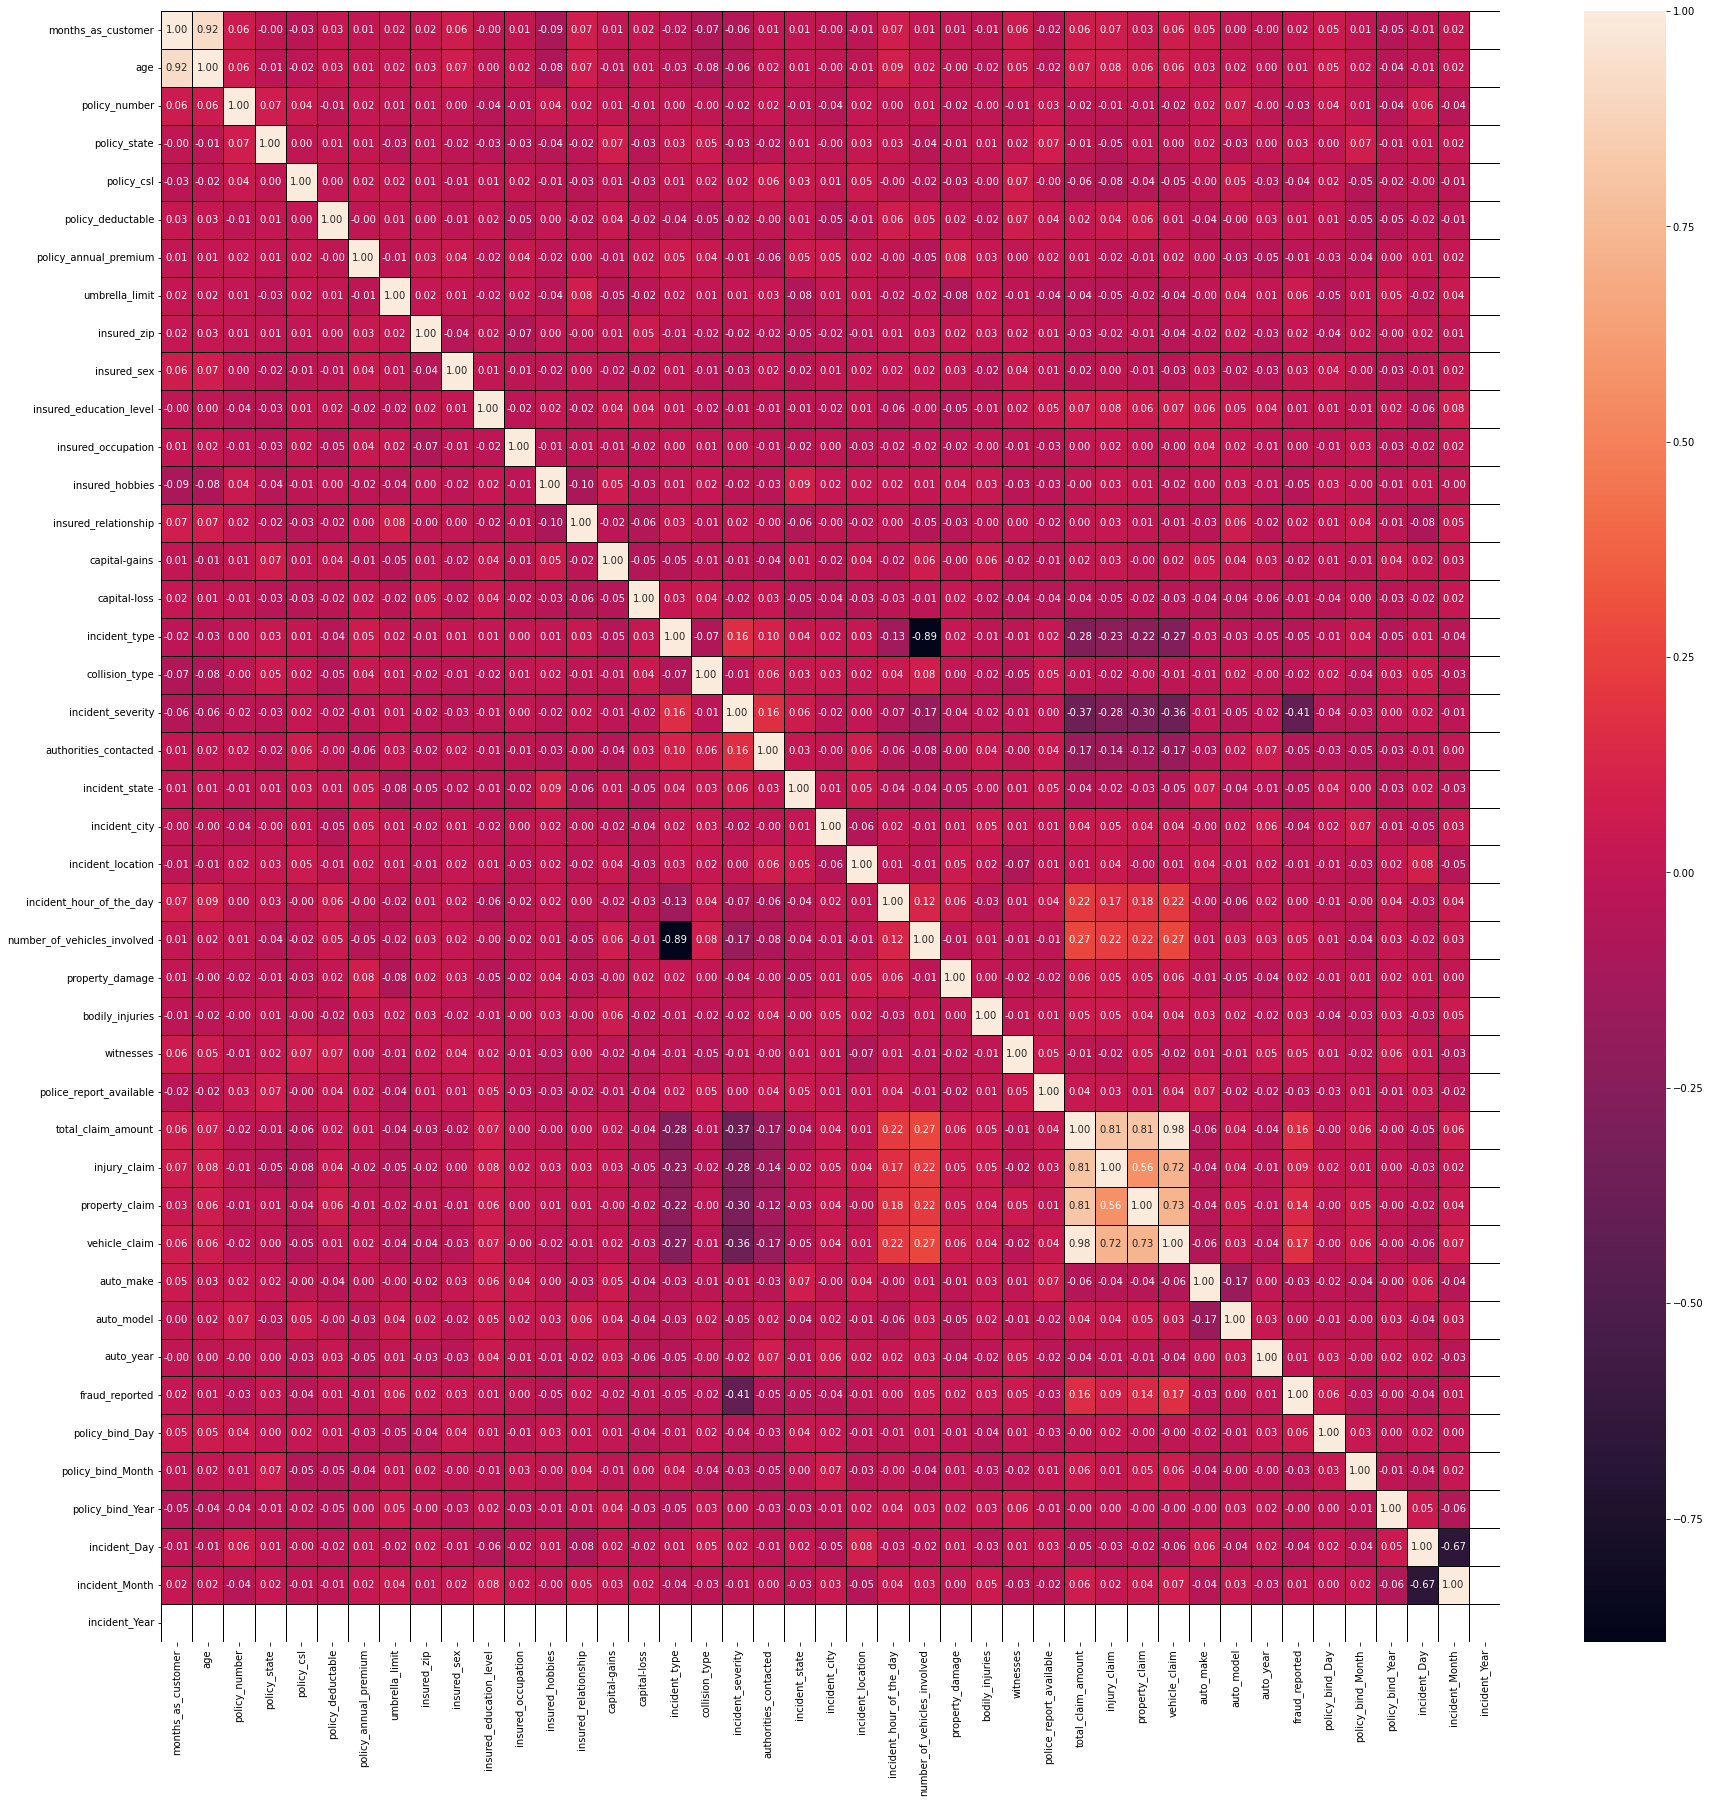

In [28]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

                Correlation of feature variable with the target variable

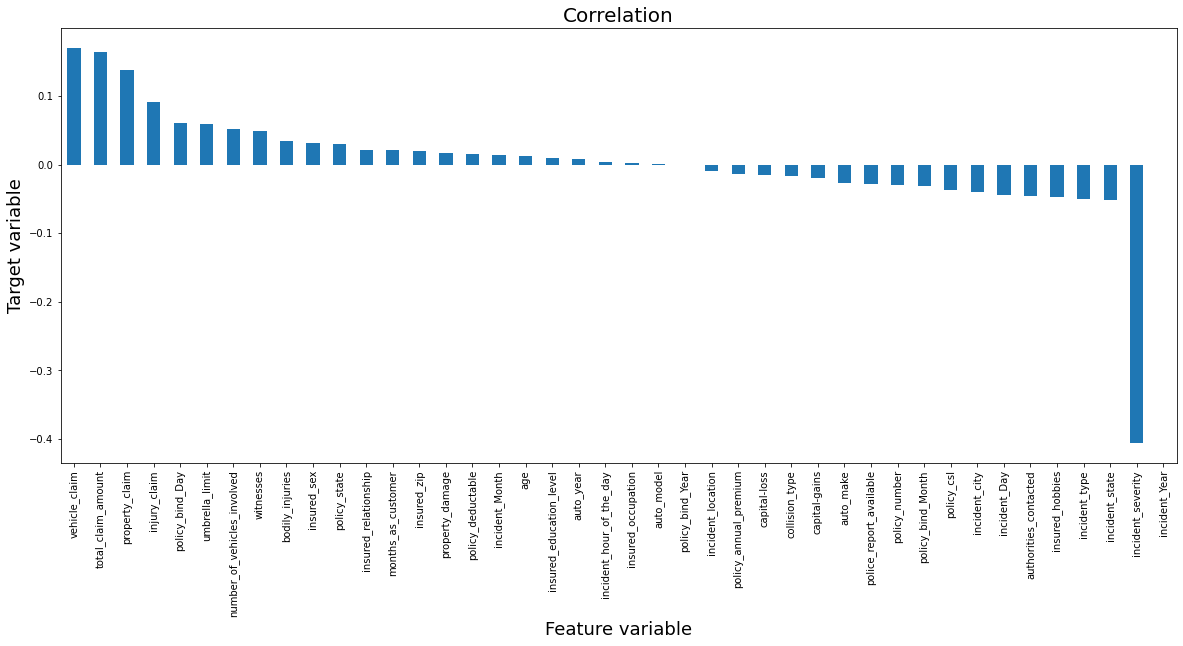

In [29]:
plt.figure(figsize=(20,8))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The correltion of independent and dependent variable:
    
    * vehicle_claim,total_claim_amount,property_claim,injury_claim ,incident_severity have higher relation
    * and left of those columns all have lower relation with the target variable.

policy_bind_Year and incident_Year have no correlation so we drop both of the columns from the data.

In [30]:
data=data.drop(['policy_bind_Year','incident_Year'],axis=1)
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,incident_Day,incident_Month
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,13020,52080,10.0,1.0,2004,1.0,17,10,25,1
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,780,3510,8.0,12.0,2007,1.0,27,6,21,1
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,3850,23100,4.0,30.0,2007,0.0,9,6,22,2
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,6340,50720,3.0,34.0,2014,1.0,25,5,1,10
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,650,4550,0.0,31.0,2009,0.0,6,6,17,2


                     Relation between one independent and another independent variable

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

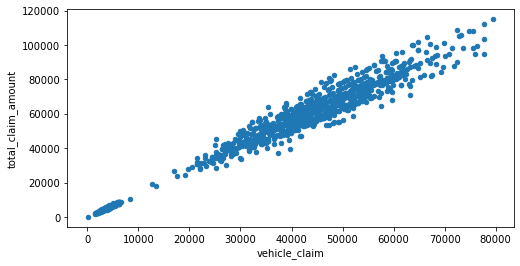

In [31]:
data.plot(kind='scatter', x='vehicle_claim', y='total_claim_amount',figsize=(8,4))

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

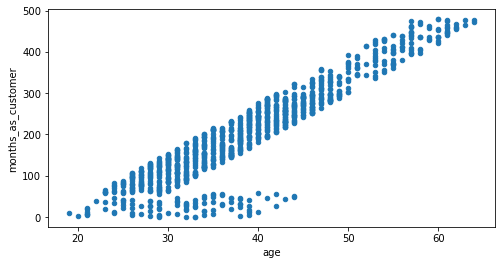

In [32]:
data.plot(kind='scatter', x='age', y='months_as_customer',figsize=(8,4))

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

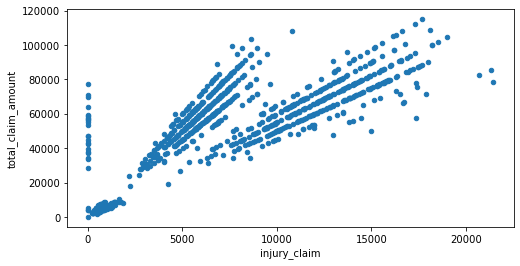

In [33]:
data.plot(kind='scatter', x='injury_claim', y='total_claim_amount',figsize=(8,4))

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

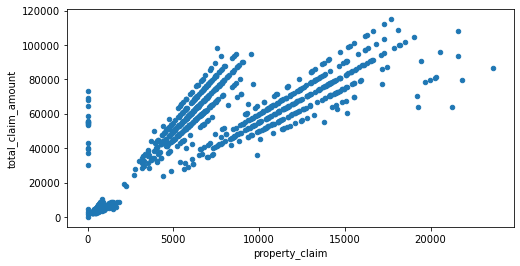

In [34]:
data.plot(kind='scatter', x='property_claim', y='total_claim_amount',figsize=(8,4))

<AxesSubplot:xlabel='injury_claim', ylabel='vehicle_claim'>

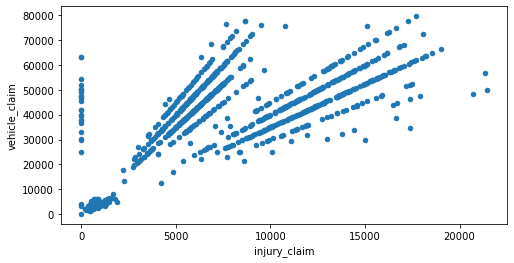

In [35]:
data.plot(kind='scatter', x='injury_claim', y='vehicle_claim',figsize=(8,4))

<AxesSubplot:xlabel='property_claim', ylabel='vehicle_claim'>

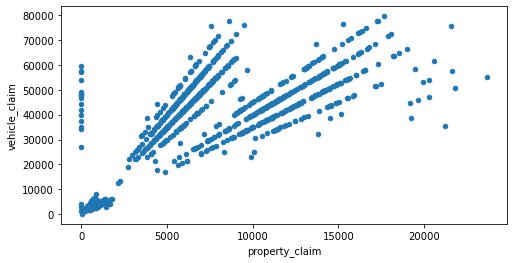

In [36]:
data.plot(kind='scatter', x='property_claim', y='vehicle_claim',figsize=(8,4))

All the feature variable have positively relation with the another feature variable.

                                            Outliers

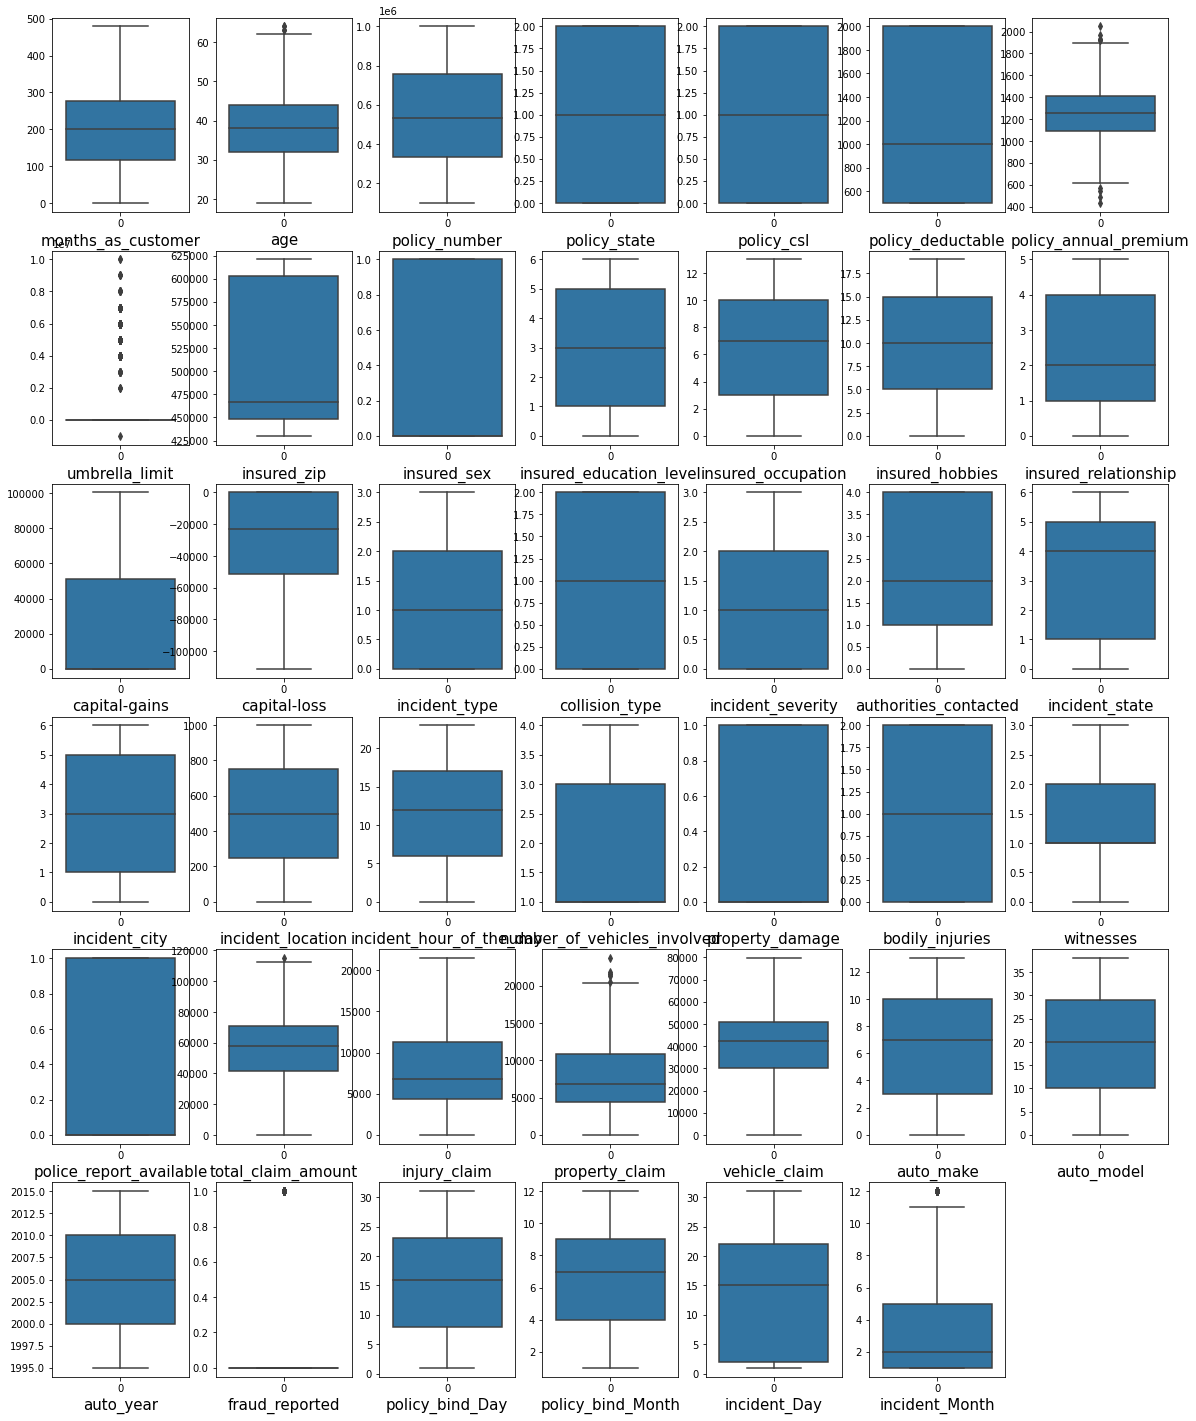

In [39]:
plt.figure(figsize=(20,25))
number = 1

for column in data:
    if number <=41:
        plt.subplot(6,7,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

There are five columns having outliers in the dataset:
    
    * age
    * policy_annual_premium
    * umbrella_limit
    * total_claim_amount
    * property_claim
    * incident_Month

                                          Skewness

In [40]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


Take threshold range of the skewness is(-0.5,0.5)

The skewness present in the columns are:
    
    * umbrella_limit
    * insured_zip
    * total_claim_amount
    * vehicle_claim
    * incident_Month    

                                        Variance Inflation Factor

In [41]:
x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,6.844422,months_as_customer
1,6.859316,age
2,1.032398,policy_number
3,1.046644,policy_state
4,1.034436,policy_csl
5,1.040042,policy_deductable
6,1.041789,policy_annual_premium
7,1.036317,umbrella_limit
8,1.030449,insured_zip
9,1.029304,insured_sex


Eight columns have VIF greater than 5

In [42]:
data=data.drop(['vehicle_claim'],axis=1)

x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,6.844422,months_as_customer
1,6.859316,age
2,1.032398,policy_number
3,1.046644,policy_state
4,1.034436,policy_csl
5,1.040042,policy_deductable
6,1.041789,policy_annual_premium
7,1.036317,umbrella_limit
8,1.030449,insured_zip
9,1.029304,insured_sex


Four columns have VIF greater than 5

In [43]:
data=data.drop(['age'],axis=1)

x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.052026,months_as_customer
1,1.032244,policy_number
2,1.045438,policy_state
3,1.033741,policy_csl
4,1.040041,policy_deductable
5,1.040545,policy_annual_premium
6,1.036305,umbrella_limit
7,1.029920,insured_zip
8,1.027515,insured_sex
9,1.048659,insured_education_level


Three columns have VIF greater than 5


In [44]:
data=data.drop(['total_claim_amount'],axis=1)

x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.051234,months_as_customer
1,1.031743,policy_number
2,1.045067,policy_state
3,1.033113,policy_csl
4,1.032241,policy_deductable
5,1.036486,policy_annual_premium
6,1.036264,umbrella_limit
7,1.023783,insured_zip
8,1.024039,insured_sex
9,1.047897,insured_education_level


Two columns having VIF greater than 5.

In [45]:
data=data.drop(['incident_type'],axis=1)

x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.051233,months_as_customer
1,1.030703,policy_number
2,1.044920,policy_state
3,1.032673,policy_csl
4,1.031770,policy_deductable
5,1.035937,policy_annual_premium
6,1.036245,umbrella_limit
7,1.022917,insured_zip
8,1.020227,insured_sex
9,1.046879,insured_education_level


Now,there is no multicolinearity exist in the data.

                                           Removing Outliers

In [46]:
x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

z=np.abs(zscore(x))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [47]:
new_data=data[(z<3).all(axis=1)]

In [48]:
print("Old data frame:",data.shape)
print("New data frame:",new_data.shape)
print("Total dropped rows:",data.shape[0]-new_data.shape[0])

Old data frame: (1000, 37)
New data frame: (980, 37)
Total dropped rows: 20


In [49]:
loss_percentage=(1000-980)/1000*100
print(loss_percentage,'%')

2.0 %


There is only a loss of 2% so we remove those outliers from the data.

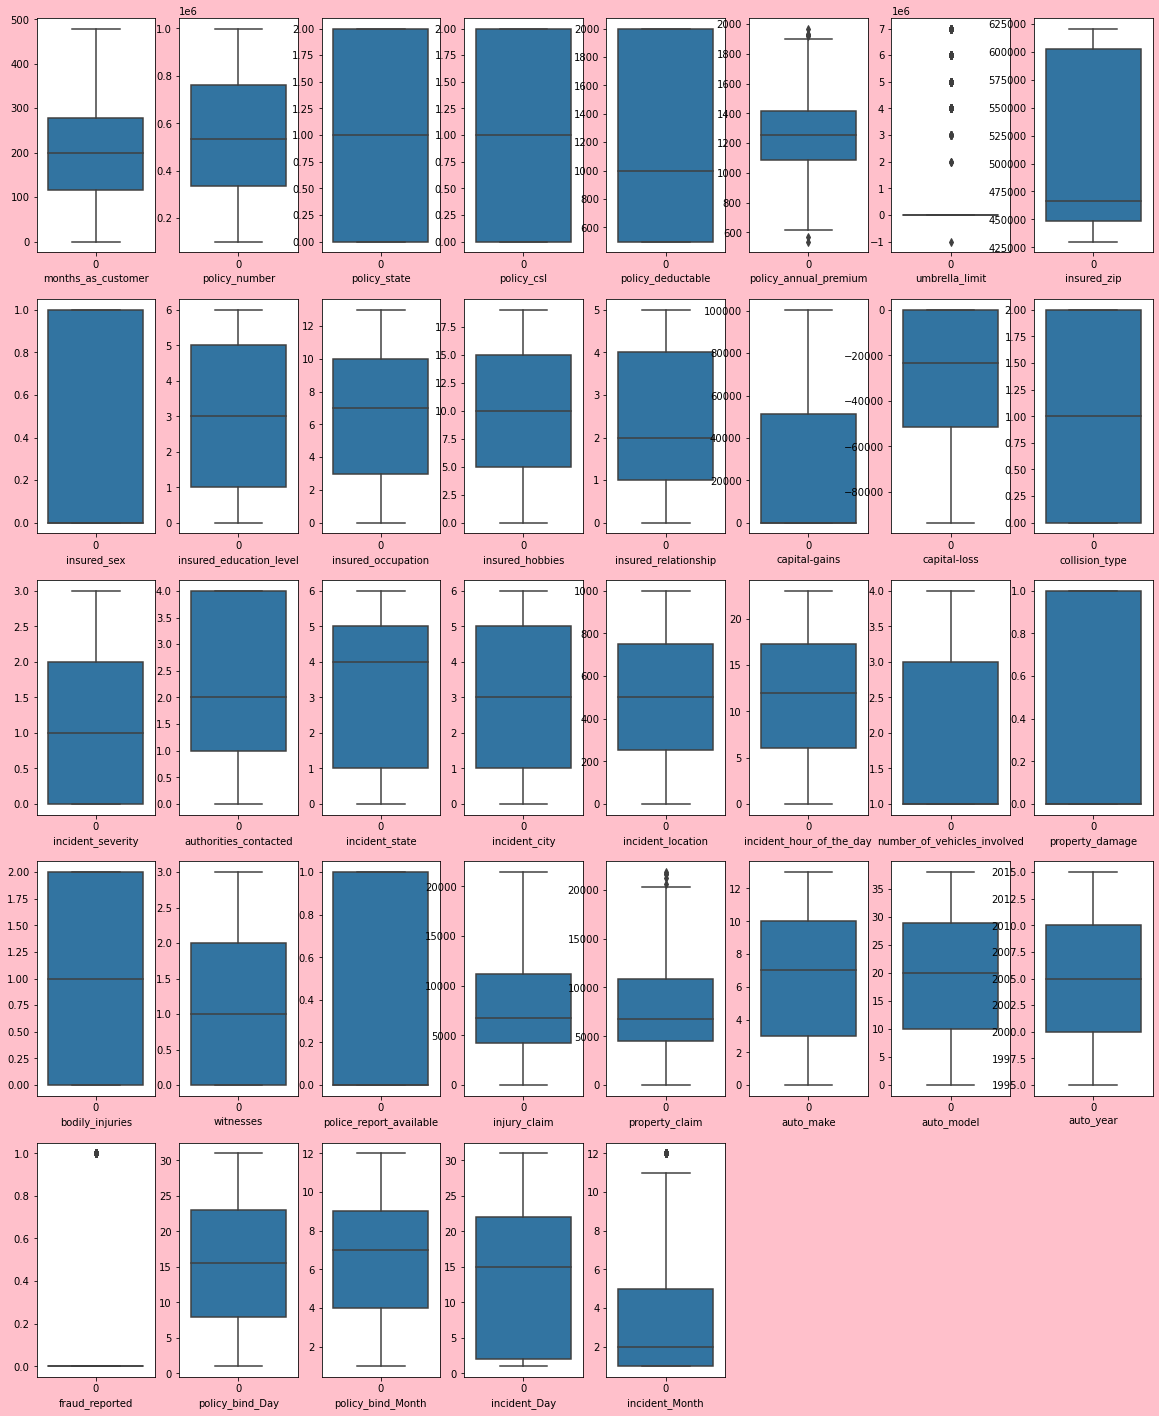

In [50]:
plt.figure(figsize=(20,25),facecolor='pink')
number = 1

for column in new_data:
    if number <=37:
        plt.subplot(5,8,number)
        ax = sns.boxplot(data=new_data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()    

Still, there are three columns having outliers in the dataset:
    
    * policy_annual_premium
    * umbrella_limit
    * property_claim
    * incident_Month

                                           Removing Skewness

In [51]:
new_data['umbrella_limit']=np.sqrt(new_data['umbrella_limit'])
new_data['insured_zip']=np.sqrt(new_data['insured_zip'])
new_data['incident_Month']=np.sqrt(new_data['incident_Month'])

In [52]:
new_data.skew()

months_as_customer             0.362608
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.648539
insured_zip                    0.820824
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757


Still skewness present in the columns are:
    
    * umbrella_limit
    * insured_zip
    * incident_Month 

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

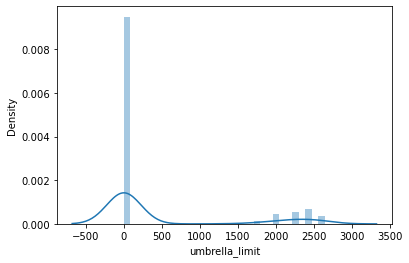

In [53]:
sns.distplot(new_data['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

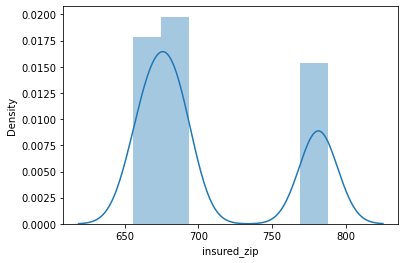

In [54]:
sns.distplot(new_data['insured_zip'])

<AxesSubplot:xlabel='incident_Month', ylabel='Density'>

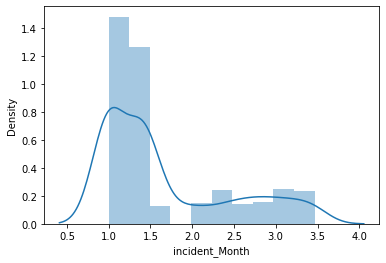

In [55]:
sns.distplot(new_data['incident_Month'])

In [56]:
new_data=new_data.drop(['umbrella_limit','insured_zip','incident_Month'],axis=1)
new_data.head()

,months_as_customer,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,incident_Day
0,328,521585,2.0,1.0,1000,1406.91,1.0,4.0,2.0,17.0,...,1.0,6510,13020,10.0,1.0,2004,1.0,17,10,25
1,228,342868,1.0,1.0,2000,1197.22,1.0,4.0,6.0,15.0,...,0.0,780,780,8.0,12.0,2007,1.0,27,6,21
2,134,687698,2.0,0.0,2000,1413.14,0.0,6.0,11.0,2.0,...,0.0,7700,3850,4.0,30.0,2007,0.0,9,6,22
3,256,227811,0.0,1.0,2000,1415.74,0.0,6.0,1.0,2.0,...,0.0,6340,6340,3.0,34.0,2014,1.0,25,5,1
4,228,367455,0.0,2.0,1000,1583.91,1.0,0.0,11.0,2.0,...,0.0,1300,650,0.0,31.0,2009,0.0,6,6,17


# Model Testing

In [57]:
x=new_data.drop(['fraud_reported'],axis=1)
y=new_data['fraud_reported']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

                                        Oversample the imbalanced data

In [58]:
!pip install imbalanced-learn

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [60]:
x_scaled.shape,y.shape

((980, 33), (980,))

In [61]:
Oversample=SMOTE(0.80)
x_scaled,y=Oversample.fit_resample(x_scaled,y)

In [62]:
x_scaled.shape,y.shape

((1332, 33), (1332,))

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.20,random_state =41)
print("The no. classes before fit {}".format(Counter(y_train)))

The no. classes before fit Counter({0.0: 595, 1.0: 470})


In [64]:
y_test.value_counts()

0.0    145
1.0    122
Name: fraud_reported, dtype: int64

Now the data is balanced for the classification process

                                          Logistic Regression

In [65]:
lr=LogisticRegression()

In [66]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 75.21126760563381
Testing accuracy score: 72.65917602996255


The model perform very well
random state 1
Training accuracy score: 75.68075117370891
Testing accuracy score: 74.15730337078652


The model perform very well
random state 2
Training accuracy score: 76.05633802816901
Testing accuracy score: 74.15730337078652


The model perform very well
random state 3
Training accuracy score: 75.11737089201877
Testing accuracy score: 76.02996254681648


The model perform very well
random state 4
Training accuracy score: 77.27699530516432
Testing accuracy score: 70.0374531835206


The model perform very well
random state 5
Training accuracy score: 76.05633802816901
Testing accuracy score: 70.4119850187266


The model perform very well
random state 6
Training accuracy score: 76.33802816901408
Testing accuracy score: 73.03370786516854


The model perform very well
random state 7
Training accuracy score: 75.39906103286384
Testin

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=12)  

In [68]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 75.28089887640449


In [69]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[117  35]
 [ 31  84]]


In [70]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       152
         1.0       0.71      0.73      0.72       115

    accuracy                           0.75       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.75      0.75      0.75       267



In [71]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.734984984984985


At cross fold 3 the cv score is 0.7379879879879879


At cross fold 4 the cv score is 0.7372372372372371


At cross fold 5 the cv score is 0.7477823772915435


At cross fold 6 the cv score is 0.743993993993994


At cross fold 7 the cv score is 0.743290162579223


At cross fold 8 the cv score is 0.7440300122646274


At cross fold 9 the cv score is 0.7417417417417417




In [72]:
lrscore=cross_val_score(lr,x_scaled,y,cv=5)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 74.77823772915436


                                        K Neighbors Classifier

In [73]:
knn= KNeighborsClassifier()

In [74]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 75.5868544600939
Testing accuracy score: 64.7940074906367


The model perform very well
random state 1
Training accuracy score: 74.46009389671362
Testing accuracy score: 65.54307116104869


The model perform very well
random state 2
Training accuracy score: 75.86854460093898
Testing accuracy score: 64.41947565543072


The model perform very well
random state 3
Training accuracy score: 73.33333333333333
Testing accuracy score: 65.54307116104869


The model perform very well
random state 4
Training accuracy score: 74.74178403755869
Testing accuracy score: 66.29213483146067


The model perform very well
random state 5
Training accuracy score: 76.52582159624414
Testing accuracy score: 70.78651685393258


The model perform very well
random state 6
Training accuracy score: 73.52112676056338
Testing accuracy score: 66.66666666666666


The model perform very well
random state 7
Training accuracy score: 75.77464788732394
Testin

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=5) 

In [76]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 70.78651685393258


In [77]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 68  64]
 [ 14 121]]


In [78]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.83      0.52      0.64       132
         1.0       0.65      0.90      0.76       135

    accuracy                           0.71       267
   macro avg       0.74      0.71      0.70       267
weighted avg       0.74      0.71      0.70       267



In [79]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6411411411411412


At cross fold 3 the cv score is 0.6433933933933934


At cross fold 4 the cv score is 0.6493993993993994


At cross fold 5 the cv score is 0.6592407986257779


At cross fold 6 the cv score is 0.6561561561561561


At cross fold 7 the cv score is 0.6645120655040743


At cross fold 8 the cv score is 0.6584932544549456


At cross fold 9 the cv score is 0.6659159159159159




In [80]:
knnscore=cross_val_score(knn,x_scaled,y,cv=9)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 66.5915915915916


                                      Random Forest Classifier

In [81]:
rfc=RandomForestClassifier()

In [82]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 86.89138576779027


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 86.89138576779027


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 88.01498127340824


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 85.39325842696628


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 84.26966292134831


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 83.89513108614233


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 87.64044943820225


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 87.26591760299625


The model perform very well
random state 8
Training accu

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=69)

In [84]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 89.51310861423221


In [85]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[137  15]
 [ 13 102]]


In [86]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       152
         1.0       0.87      0.89      0.88       115

    accuracy                           0.90       267
   macro avg       0.89      0.89      0.89       267
weighted avg       0.90      0.90      0.90       267



In [87]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8355855855855856


At cross fold 3 the cv score is 0.8385885885885885


At cross fold 4 the cv score is 0.8536036036036035


At cross fold 5 the cv score is 0.8514882712398976


At cross fold 6 the cv score is 0.8558558558558559


At cross fold 7 the cv score is 0.8537731763964886


At cross fold 8 the cv score is 0.8583210085852392


At cross fold 9 the cv score is 0.8498498498498499




In [88]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=8)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 85.9051475362528


                                      Decision Tree Classifier

In [89]:
clf=DecisionTreeClassifier()

In [90]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 85.0187265917603


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 83.89513108614233


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 84.6441947565543


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 73.03370786516854


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 85.0187265917603


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 80.52434456928839


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 83.89513108614233


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 85.0187265917603


The model perform very well
random state 8
Training accuracy

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=61) 

In [92]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 86.51685393258427


In [93]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[132  23]
 [ 13  99]]


In [94]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       155
         1.0       0.81      0.88      0.85       112

    accuracy                           0.87       267
   macro avg       0.86      0.87      0.86       267
weighted avg       0.87      0.87      0.87       267



In [95]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7912912912912913


At cross fold 3 the cv score is 0.8168168168168167


At cross fold 4 the cv score is 0.8175675675675675


At cross fold 5 the cv score is 0.8251696657373773


At cross fold 6 the cv score is 0.8070570570570571


At cross fold 7 the cv score is 0.8214226666141794


At cross fold 8 the cv score is 0.821454981603059


At cross fold 9 the cv score is 0.8168168168168168




In [96]:
clfscore=cross_val_score(clf,x_scaled,y,cv=5)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 81.39083664216722


                                                    SVC

In [97]:
svc=SVC()

In [98]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 95.962441314554
Testing accuracy score: 81.64794007490637


The model perform very well
random state 1
Training accuracy score: 95.86854460093896
Testing accuracy score: 83.14606741573034


The model perform very well
random state 2
Training accuracy score: 95.58685446009389
Testing accuracy score: 86.14232209737828


The model perform very well
random state 3
Training accuracy score: 95.58685446009389
Testing accuracy score: 83.89513108614233


The model perform very well
random state 4
Training accuracy score: 95.962441314554
Testing accuracy score: 81.27340823970037


The model perform very well
random state 5
Training accuracy score: 95.30516431924883
Testing accuracy score: 85.39325842696628


The model perform very well
random state 6
Training accuracy score: 95.30516431924883
Testing accuracy score: 85.39325842696628


The model perform very well
random state 7
Training accuracy score: 95.86854460093896
Testing 

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 40)

In [100]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 88.01498127340824


In [101]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[145  16]
 [ 16  90]]


In [102]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       161
         1.0       0.85      0.85      0.85       106

    accuracy                           0.88       267
   macro avg       0.87      0.87      0.87       267
weighted avg       0.88      0.88      0.88       267



In [103]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8130630630630631


At cross fold 3 the cv score is 0.8213213213213213


At cross fold 4 the cv score is 0.8295795795795795


At cross fold 5 the cv score is 0.8349638140294555


At cross fold 6 the cv score is 0.8415915915915916


At cross fold 7 the cv score is 0.8402472148958784


At cross fold 8 the cv score is 0.8395047254887815


At cross fold 9 the cv score is 0.8475975975975977




In [104]:
svcscore=cross_val_score(svc,x_scaled,y,cv=9)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 84.75975975975977


The accuracy_score and cv_score of all the models:

* Logistic Regression
        accuracy_score: 75.28
        cv_score: 74.77

* K Neighbors Classifier
        accuracy_score: 70.78
        cv_score: 66.59

* Decision Tree Classifier
        accuracy_score: 86.51
        cv_score: 81.39

* Random Forest Classifier
        accuracy_score: 89.51
        cv_score: 85.90

* SVC
        accuracy_score: 88.01
        cv_score: 84.75
        
All the models give better score but Random Forest Classifier is the best one in all of them, so we select that model for hyper
parameter tuning.

     Modeling of Random Forest Classifier
                  
                                        Hyper parameter tuning

In [105]:
rfc=RandomForestClassifier()

In [106]:
parameters={'max_features':['auto','sqrt'],
            'max_depth': range(2,100),
            'criterion':['gini','entropy '],
            'min_samples_split':range(2,10)}

In [115]:
GCV=GridSearchCV(rfc,parameters,cv=8,n_jobs=-1)
GCV.fit(x_train,y_train) 
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [116]:
clf = RandomForestClassifier(min_samples_split=2,criterion='gini',max_features='sqrt',max_depth=18)
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)*100

87.26591760299625

                                    Plot ROC_AUC curve and find the AUC value

In [117]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

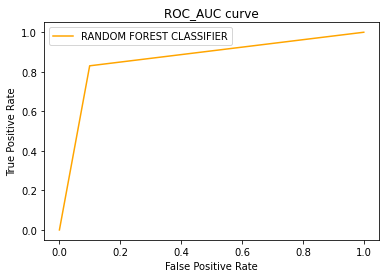

AUC_score 86.54048986288527


In [119]:
plt.plot(fpr,tpr,color='orange',label='RANDOM FOREST CLASSIFIER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred)*100
print("AUC_score",auc_score)

ROC_AUC score is 87.26 and AUC score is 86.54, which is little lesser than ROC_AUC score. 

                                             Save file

In [120]:
import joblib

joblib.dump(GCV.best_params_,"Insurance_Claim_Fraud_Detection.pkl")

['Insurance_Claim_Fraud_Detection.pkl']

                                             Conclusion

In [121]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred})
Prediction

,Actual data,Predicted data
617,0.0,0.0
1186,1.0,1.0
471,1.0,0.0
729,1.0,1.0
754,0.0,0.0
...,...,...
270,1.0,0.0
1095,1.0,1.0
753,0.0,0.0
1009,1.0,1.0
